<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba12/OSuM_Vezba12/OSuM_vezba_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82


Laboratorijska ve≈æba 12: Perspektivne transformacije i kruta registracija

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot, osum

In [ ]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba12/OSuM_Vezba12

fatal: destination path 'OSuM' already exists and is not an empty directory.
/content/OSuM/OSuM_Vezba12/OSuM_Vezba12


In [ ]:
import cv2
import osum
import matplotlib.pyplot as plt
import numpy as np

# 1. Odabiranje (interpolacija) referentnog regiona za registraciju

1.1 U promenljivu r uƒçitati referentnu sliku REG_HE.png, a u promenljivu t uƒçitati test sliku po izboru REG_LE_0X.PNG. Prikazati slike. Sve test slike su translirane po x i/ili y-osi u odnosu na referentnu.

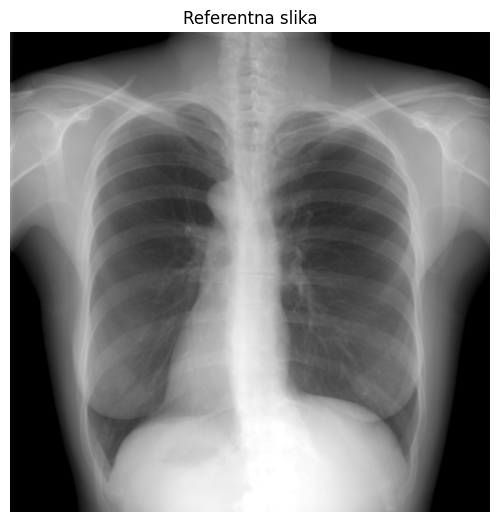

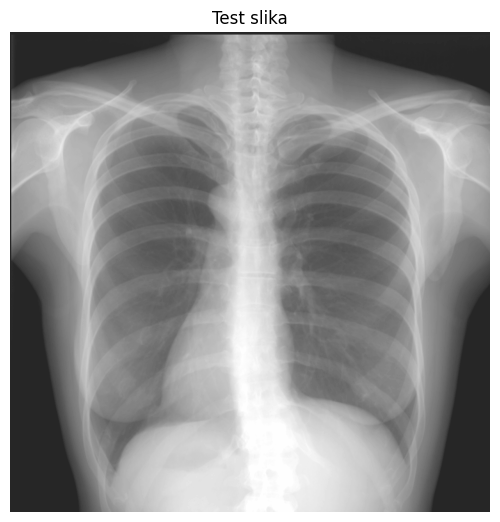

In [ ]:
# 1.1
r = cv2.imread('RAD_HE.png', cv2.IMREAD_GRAYSCALE)
t = cv2.imread('REG_LE_01.PNG', cv2.IMREAD_GRAYSCALE)

osum.disp_im(r, title='Referentna slika')
osum.disp_im(t, title='Test slika')
plt.show()

1.2 Izdvojiti region pluƒáa (region of interest - ROI) od 15% do 75% visine slike i 10% do 90% ≈°irine slike.

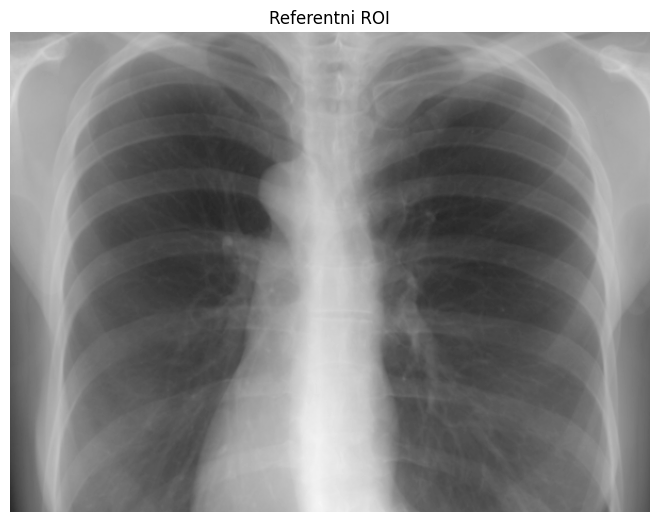

In [ ]:
# 1.2
v,k = r.shape
v1 = round(0.15*v)
v2 = round(0.75*v)
k1 = round(0.1*k)
k2 = round(0.9*k)
r_roi = r[v1-1:v2, k1-1:k2]
osum.disp_im(r_roi, title='Referentni ROI')

1.3 Interpolirati referentnu sliku u domenu koji defini≈°e ROI, tako da se izmeƒëu svakog postojeƒáeg piksela da unese dodatna lokacija. Koristiti bilinearnu metodu interpolacije.

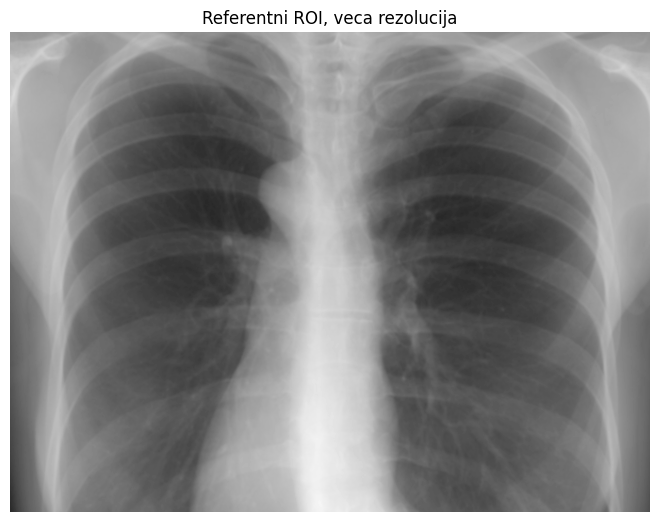

In [ ]:
# 1.3
nx = 0.5
ny = 0.5
[X, Y] = np.meshgrid(np.arange(k1-1, k2, nx), np.arange(v1-1, v2, ny))
X = np.float32(X) # funkcija cv2.remap zahteva koordinate u tipu float32
Y = np.float32(Y)
iR = cv2.remap(r, X, Y, interpolation=cv2.INTER_LINEAR)
osum.disp_im(iR, title='Referentni ROI, veca rezolucija')

1.4 Interpolirati referentnu sliku na indeksima (lokacijama) od 500 do 800 po x i y koordinati. Buduƒái da ove lokacije izlaze iz prostora u kome je definisana referentna slika, potrebno je definisati ekstrapolacionu vrednost (npr. neka iznosi 100).

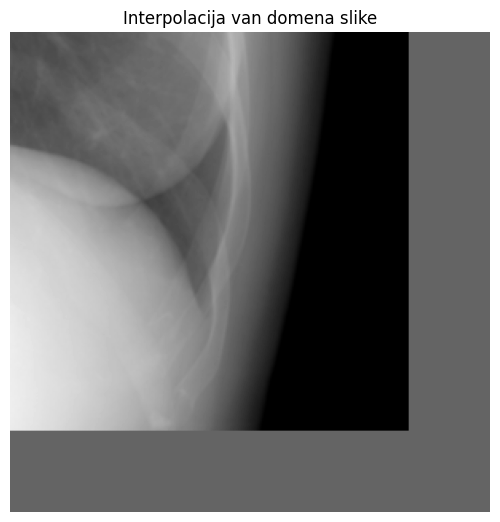

In [ ]:
# 1.4
[X, Y] = np.meshgrid(np.arange(500, 801), np.arange(500, 801))
X = np.float32(X)
Y = np.float32(Y)
iR = cv2.remap(r, X, Y, interpolation=cv2.INTER_LINEAR, borderValue=100)
osum.disp_im(iR, title='Interpolacija van domena slike')

1.5 Na domenu koji defini≈°e ROI interpolirati referentnu i test sliku i izraƒçunati koliko iznosi suma njihovih apsolutnih razlika.

In [ ]:
# 1.5
[X, Y] = np.meshgrid(np.arange(k1-1, k2), np.arange(v1-1, v2))
X = np.float32(X)
Y = np.float32(Y)
iR = cv2.remap(r, X, Y, interpolation=cv2.INTER_LINEAR)
iT = cv2.remap(t, X, Y, interpolation=cv2.INTER_LINEAR)
sAbs = np.sum(np.abs(iR-iT))

1.6 Kako bi se uhvatile razlike u strukturi, a ne u osvetljaju, ponoviti korak 1.5 sa z-normalizovanim slikama, izabrati proizvoljne parametre. Kako se promenila suma apsolutnih razlika?

In [ ]:
# 1.6
iRz = cv2.remap(osum.z_norm(r), X, Y, interpolation=cv2.INTER_LINEAR)
iTz = cv2.remap(osum.z_norm(t), X, Y, interpolation=cv2.INTER_LINEAR)
sAbsZ = np.sum(np.abs(iRz-iTz))

# 2. Perspektivne transformacije

2.1 Test slika je translirana u odnosu na referentnu, pa ju je potrebno transformisati (translirati) kako bi se geometrijski poklopila sa referentnom slikom. Zapravo se translira definisani region na test slici. Nakon odabiranja referentne slike potrebno je modifikovati koordinate [x, y] na kojima se odabira test slika tako da im se doda neki proizvoljni pomeraj, npr. (2,3). Pomeranje se mora uraditi odvojeno: x_tr = x + 2; y_tr = y + 3. Raditi sa z-normalizovanim slikama. Da li nakon translacije suma apsolutnih razlika izmeƒëu ROI-a referentne i test slike veƒáa ili manja i ≈°ta taj rezultat znaƒçi?

In [ ]:
# 2.1
[x, y] = np.meshgrid(np.arange(k1-1, k2), np.arange(v1-1, v2))
x = np.float32(x)
y = np.float32(y)
iRz = cv2.remap(osum.z_norm(r), x, y, interpolation=cv2.INTER_LINEAR)

x_tr = X+2
y_tr = Y+3
iTt = cv2.remap(osum.z_norm(t), x_tr, y_tr, interpolation=cv2.INTER_LINEAR)

sAbst = np.sum(np.abs(iRz-iTt))

2.2 Za registraciju na≈°e test slike na referentnu dovoljna nam je transformacija
translacijom, meƒëutim postoje i druge perspektivne transformacije koje se mogu
primeniti u registraciji. Rotirati referentnu sliku prvo oko koordinatnog poƒçetka u gornjoj levoj taƒçki slike, a zatim oko centra slike, za proizvoljni ugao. Koordinate slike nakon rotacije oko proizvoljne taƒçke za ugao ùúÉ u radijanima definisane su sledeƒáom transformacijom:

\begin{align}
t_{crot}(p, r) = \begin{pmatrix} cos\theta & sin\theta \\ sin\theta & cos\theta \end{pmatrix}\begin{pmatrix} x - x_c \\ y - y_c \end{pmatrix} + \begin{pmatrix} x_c \\ y_c \end{pmatrix}
\end{align}

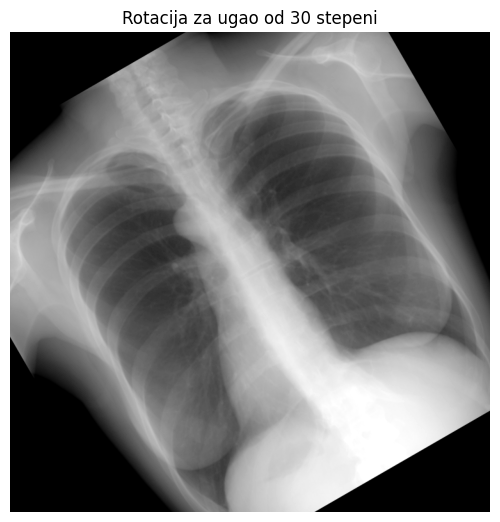

In [ ]:
# 2.2
th_deg = 30
th = th_deg*np.pi/180 # transformacija iz stepena u radijane
# koordinatni pocetak u gornjem levom uglu slike
# xc = 0
# tc = 0
# tacka u centru slike
xc = int(np.floor(r.shape[1]/2))
yc = int(np.floor(r.shape[0]/2))
[x, y] = np.meshgrid(np.arange(0, r.shape[1]), np.arange(0, r.shape[0]))
xr = np.cos(th)*(x-xc)-np.sin(th)*(y-yc)+xc
yr = np.sin(th)*(x-xc)+np.cos(th)*(y-yc)+yc
xr = np.float32(xr)
yr = np.float32(yr)
rr = cv2.remap(r, xr, yr, interpolation=cv2.INTER_LINEAR, borderValue=0)
osum.disp_im(rr, title='Rotacija za ugao od '+str(th_deg)+' stepeni')

2.3 Uveliƒçati (umanjiti) sliku proizvoljnim faktorom s (uveliƒçanje iznosi 1/s) prvo iz koordinatnog poƒçetka u gornjem levom uglu, a zatim iz centra slike. Transformacija uveliƒçanjem je definisana na sledeƒái naƒçin:

\begin{align}
t_{zoom}(p, r) = \begin{pmatrix} s & 0 \\ 0 & s \end{pmatrix}\begin{pmatrix} x - x_c \\ y - y_c \end{pmatrix} + \begin{pmatrix} x_c \\ y_c \end{pmatrix}
\end{align}

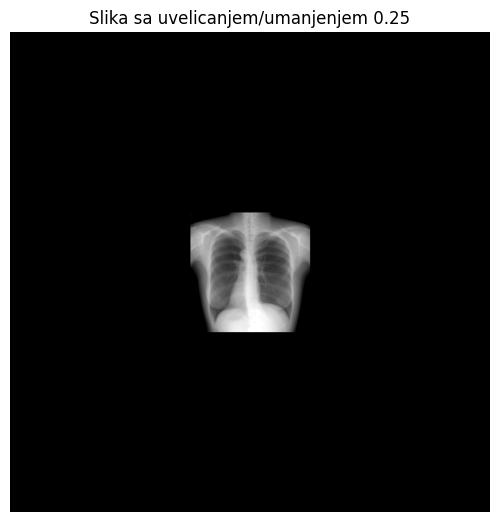

In [ ]:
# 2.3
s = 4
# s = 0.5
# koordinatni pocetak u gornjem levom uglu slike
# xc = 0
# yc = 0
# tacka u centru slike
xc = int(np.floor(r.shape[1]/2))
yc = int(np.floor(r.shape[0]/2))
xs = np.float32(s*(x-xc)+xc)
ys = np.float32(s*(y-yc)+yc)
rs = cv2.remap(r, xs, ys, interpolation=cv2.INTER_LINEAR, borderValue=0)
osum.disp_im(rs, title='Slika sa uvelicanjem/umanjenjem '+str(1/s))

# 3. Kruta registracija translacijom

3.1 Napraviti GUI preko koga korisnik mo≈æe da defini≈°e referentni ROI za registraciju klikom na gornji levi, a zatim na donji desni ƒáo≈°ak regiona od interesa. Prikazati izabrani region.

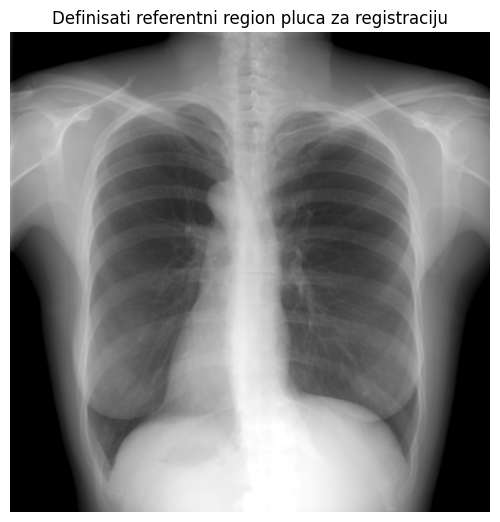

IndexError: ignored

In [ ]:
# 3.1
osum.disp_im(r, title='Definisati referentni region pluca za registraciju')
# potrebno je zakomentarisati svaku liniju plt.show() iznad da bi sledeca linija koda radila kako treba
refPts = plt.ginput(2)  # funkcija ocekuje koordinate 2 tacke koje unese korisnik

# potrebne su int vrednosti za indeksiranje
refPts1 = [int(np.round(pt)) for pt in refPts[0]]
refPts2 = [int(np.round(pt)) for pt in refPts[1]]
k1,v1 = refPts1
k2,v2 = refPts2
ref_roi = r[v1:v2+1, k1:k2+1]

osum.disp_im(ref_roi, title='Referenti ROI za registraciju')

3.2 Interpolirati z-normalizovanu referentnu sliku na izabranom regionu.


In [ ]:
# 3.2
[X, Y] = np.meshgrid(np.arange(k1, k2+1), np.arange(v1, v2+1))  # ne treba k1-1... jer ginput belezi koordinate pocevsi od 0
X = np.float32(X)
Y = np.float32(Y)
iR = cv2.remap(osum.z_norm(r), X, Y, interpolation=cv2.INTER_LINEAR, borderValue=0)

3.3 Naƒái optimalne pomeraje po x i y-osi tako da se minimalizuje suma apsolutnih razlika izmeƒëu slika. Isprobati pomeraje od -20 do 20 i po x i po y-osi. Za svaku kombinaciju pomeraja modifikovati koordinate [x, y] i na njima interpolirati test sliku, a zatim izraƒçunati sumu apsolutnih razlika izmeƒëu z-normalizovane referentne slike I z-normalizovane translirane test slike. Saƒçuvati vrednosti objektivne funkcije u matricu d (iz koje na osnovu indeksa vrsta i kolona mo≈æemo doƒái do pomeraja po x i y-osi za koje je ostvarena odreƒëena vrednost objektivne funkcije).


In [ ]:
# 3.3
d = np.zeros((41, 41))
for tx in range(-20, 21):
    for ty in range(-20, 21):
        X_test = np.float32(X+tx)
        Y_test = np.float32(Y+ty)
        iT = cv2.remap(osum.z_norm(t), X_test, Y_test, interpolation=cv2.INTER_LINEAR, borderValue=0)
        d[ty+20, tx+20] = np.sum(np.abs(iR-iT))


3.4 Pronaƒái indekse na kojima se nalazi minimalna vrednost objektivne funkcije u matrici d i na osnovu njih izraƒçunati optimalne pomeraje po x i y-osi. Proveriti da li je to u skladu sa izgledom test slike (gde se nalaze crne linije na obodu).

In [ ]:
# 3.4
i, j = np.where(d==d.min())
dMin = d[i,j]
x_opt = j-20
y_opt = i-20

3.5 Prikazati optimizacionu povr≈°inu.

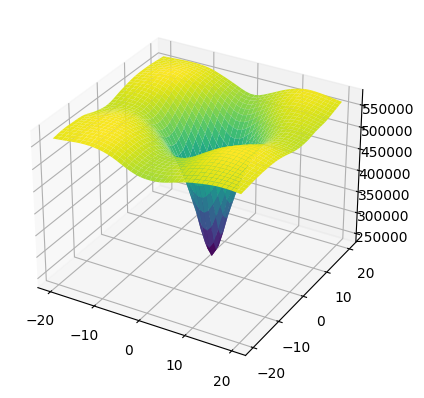

In [ ]:
# 3.5
fig = plt.figure()
ax = plt.axes(projection='3d')
[x, y] = np.meshgrid(np.arange(-20, 21), np.arange(-20, 21))  # pomeraji po x i y-osi
ax.plot_surface(x, y, d, cmap='viridis')